In [0]:
import os
import numpy as np
from keras.preprocessing import image
PATH=os.getcwd()
train_path=PATH+'\DevanagariHandwrittenCharacterDataset\Train'
train_batch=os.listdir(train_path)



D:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [0]:
x_train=[]
y_train=[]
names={}

i=0
for classes in train_batch:
# #         print(classes)
        
        imaes_list = os.listdir(train_path+'\\'+classes)
        for imaes in imaes_list:

            img_path=train_path+ '\\' + classes+ '\\'+ imaes
            x=image.load_img(img_path)
            x=np.array(x)
            x = np.asarray(x)
            
            x_train.append(x)

            y_train.append(i)
            names[i]=classes
        i=i+1

In [0]:
test_path=PATH+'\DevanagariHandwrittenCharacterDataset\Test'
test_batch=os.listdir(test_path)
x_test=[]
y_test=[]
names_test={}
i=0
for classes in test_batch:

        imaes_list = os.listdir(test_path+'\\'+classes)
        for imaes in imaes_list:

            img_path=test_path+ '\\' + classes+ '\\'+ imaes
            x=image.load_img(img_path)
            x=np.array(x)
            x = np.asarray(x)

            x_test.append(x)
            y_test.append(i)
            names_test[i]=classes
        i=i+1

In [0]:
x_test=np.array(x_test)
x_test=x_test.reshape(13800,32,32,3)
x_train=np.array(x_train) 
x_train=x_train.reshape(78200,32,32,3)

In [0]:
y_train=np.array(y_train)
y_test=np.array(y_test)

In [0]:
from __future__ import print_function
import keras
# from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
import matplotlib.pylab as plt

In [0]:
model = Sequential()
model.add(Conv2D(4, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(8, (5, 5),strides=(1,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(46, activation='softmax'))

In [0]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=['accuracy'])

In [0]:
# model.compile(loss=keras.losses.sparse_categorical_crossentropy,
#               optimizer=keras.optimizers.SGD(lr=0.01),
#               metrics=['accuracy'])


In [0]:
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))

history = AccuracyHistory()

In [0]:
model.fit(x_train, y_train,
          batch_size=200,
          epochs=50,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[history])

Train on 78200 samples, validate on 13800 samples
Epoch 1/50
78200/78200 [==============================] - 101s 1ms/step - loss: 3.9606 - acc: 0.0933 - val_loss: 2.8269 - val_acc: 0.2437
Epoch 2/50
78200/78200 [==============================] - 98s 1ms/step - loss: 2.3094 - acc: 0.3661 - val_loss: 2.0466 - val_acc: 0.4171
Epoch 3/50
78200/78200 [==============================] - 99s 1ms/step - loss: 1.8343 - acc: 0.4808 - val_loss: 1.6146 - val_acc: 0.5304
Epoch 4/50
78200/78200 [==============================] - 99s 1ms/step - loss: 1.6339 - acc: 0.5361 - val_loss: 1.5255 - val_acc: 0.5606
Epoch 5/50
78200/78200 [==============================] - 98s 1ms/step - loss: 1.4882 - acc: 0.5742 - val_loss: 1.3118 - val_acc: 0.6264
Epoch 6/50
78200/78200 [==============================] - 99s 1ms/step - loss: 1.3629 - acc: 0.6076 - val_loss: 2.0273 - val_acc: 0.4303
Epoch 7/50
78200/78200 [==============================] - 98s 1ms/step - loss: 1.2800 - acc: 0.6323 - val_loss: 1.3553 - val_ac

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5297949976687306
Test accuracy: 0.8519565217391304


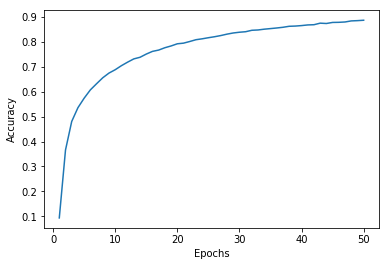

In [0]:
plt.plot(range(1,51), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [0]:
# ttt=model.predict_classes(x_test)

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 4)         304       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 8)         808       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 8)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               25728     
_________________________________________________________________
dense_2 (Dense)              (None, 46)                5934      
Total para